In [ ]:
Image_path = "IMAGE_PATH"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EasyOCR:

In [ ]:
!pip install easyocr -q

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [ ]:
def Plot_EsyOCR(image_path, results, Threshold,Time,text_size=20):
    img = cv2.imread(image_path)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for detection in results:
      if detection[2] >= Threshold:
          bbox = detection[0]
          text = detection[1]
          conf = detection[2]
          x1, y1 = bbox[0]
          x2, y2 = bbox[1]
          #cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 150), 2)
          cv2.putText(img, f"{text}", (int(x1), int(y1) - 10), font,0.4, (0, 0, 255), 2)
          cv2.putText(img, f"{conf:.2f}", (int(x1), int(y1)-30), font, 0.4, (255, 0, 0), 2)

    # Display the image using matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(16, 16))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"EasyOCR : {Time} seconds")
    plt.show()



In [ ]:
import easyocr
import time
from PIL import Image, ImageDraw, ImageFont
reader = easyocr.Reader(['fr'],gpu = False)

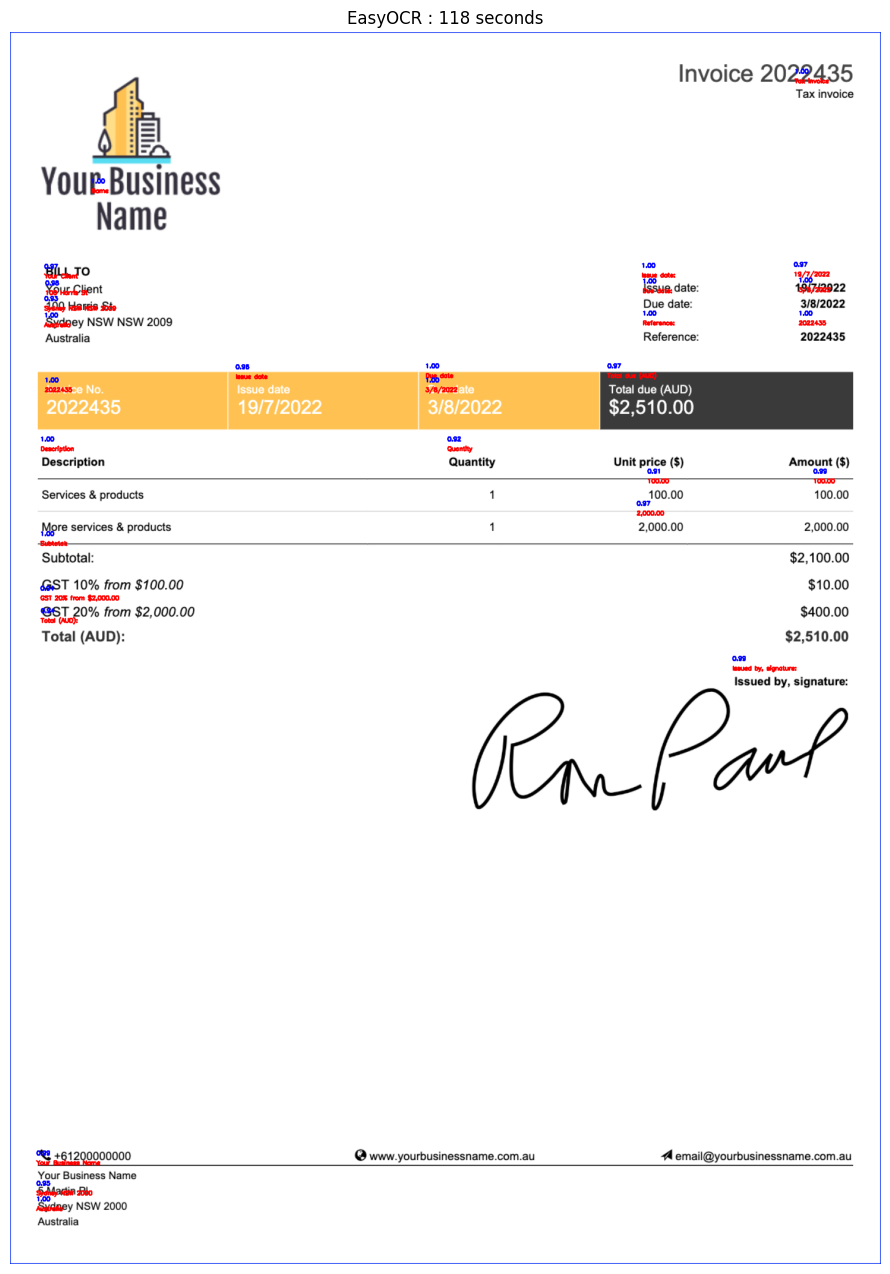

In [ ]:
start_time = time.time()

results = reader.readtext(Image_path)

end_time = time.time()

Time = end_time - start_time
Plot_EsyOCR(Image_path,results,0.9,round(Time))
#df = pd.DataFrame(results,columns=['bbox','text','conf'])

## Pytesseract:

In [ ]:
!sudo apt install tesseract-ocr -q
!pip install pytesseract -q
!apt-get install -y language-pack-fr
!export LC_ALL=fr_FR.utf8
!apt-get install -y tesseract-ocr-fra

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dia

In [ ]:
import os
if os.path.isfile('/usr/share/tesseract-ocr/4.00/tessdata/fra.traineddata'):
    print("French language file exists")
else:
    print("French language file does not exist")

French language file exists


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import pytesseract
import cv2
import matplotlib.pyplot as plt


In [ ]:
def Plot_Pytesseract(data, img_path,Threshold,Time):
    # Load the image using cv2
    img = cv2.imread(img_path)
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Iterate through the OCR data to annotate the image with rectangles, confidence, and recognized text
    for i in range(len(data['text'])):
        text = data['text'][i]
        confidence = int(data['conf'][i])
        if confidence >= Threshold:  # Adjust the confidence threshold as needed
            x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
            #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(img, text, (x, y - 5), font, 0.7, (0, 0, 255), 2)
            cv2.putText(img, str(confidence), (x, y - 25), font, 0.7, (255, 0, 0), 2)

    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image using Matplotlib
    plt.figure(figsize=(16, 16))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Pytesseract : {Time} seconds")
    plt.show()

# Example usage:
# plot_last_result(data, 'image.jpg')


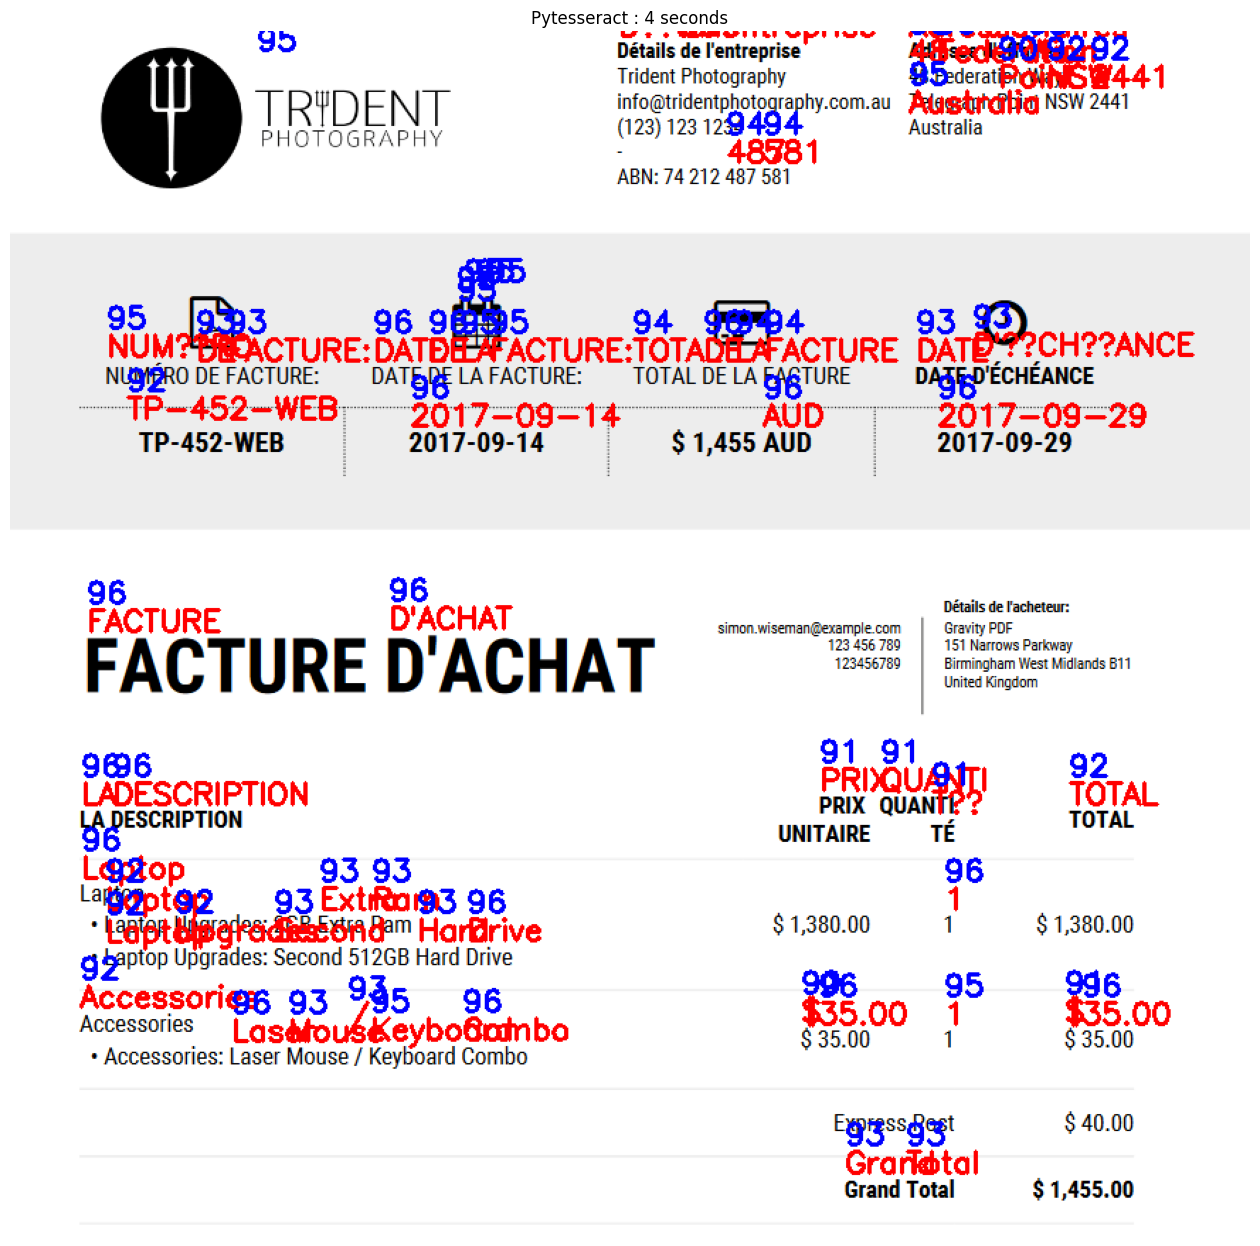

In [ ]:
# Load an image using PIL (Python Imaging Library)
img = Image.open(Image_path)
# Use pytesseract to perform OCR on the image in French
start_time = time.time()
data = pytesseract.image_to_data(img, lang='fra', output_type=pytesseract.Output.DICT)
end_time = time.time()
Time = end_time - start_time
Plot_Pytesseract(data,Image_path,90,round(Time))

## Keras_OCR:

In [ ]:
!pip install keras_ocr -q

In [ ]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
def Plot_Keras(results, img_path,Time):
    # Load the image using cv2
    img = cv2.imread(img_path)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(len(results[0])):
        text = results[0][i][0]
        x1,y1 = results[0][i][1][0,0],results[0][i][1][0,1]
        cv2.putText(img, text, (int(x1), int(y1) - 5), font, 0.7, (0, 0, 255), 2)


    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image using Matplotlib
    plt.figure(figsize=(16, 16))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Keras_OCR : {Time} seconds")
    plt.show()

# Example usage:
# plot_last_result(data, 'image.jpg')


In [ ]:
Image = cv2.imread(Image_path)

start_time = time.time()
results = pipeline.recognize([Image])
end_time = time.time()

Time = end_time - start_time
Plot_Keras(results,Image_path,round(Time))

4/8 [==============>...............] - ETA: 41s

## Paddle_OCR:

In [ ]:
## CPU :
!pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple
## GPU :
#!pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 12.7 MB/s e

In [ ]:
from paddleocr import PaddleOCR
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the image
def Plot_Paddle(results,Image_path,Time,Threshold):
      image = cv2.imread(Image_path)

      # Annotate the image with recognized text and confidence
      for result in results:
          for box, text_info in result:
              # Extract text and confidence
              text, confidence = text_info
              if confidence >= Threshold:
                  # Convert coordinates to numpy array of integers
                  box = np.array(box, dtype=np.int32)
                  box = box.reshape((-1, 1, 2))
                  # Draw bounding box
                  cv2.polylines(image, [box], isClosed=True, color=(0, 255, 0), thickness=2)
                  # Add text with confidence
                  cv2.putText(image, f"{text} ", (box[0][0][0], box[0][0][1] - 5),cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 0,  255), 1)
                  cv2.putText(image, f"{confidence:.2f} ", (box[0][0][0], box[0][0][1] - 20),cv2.FONT_HERSHEY_SIMPLEX,0.5, (255, 0,  0), 1)
      # Convert BGR to RGB
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      # Plot the annotated image using Matplotlib
      plt.figure(figsize=(16, 16))
      plt.imshow(image_rgb)
      plt.axis('off')
      plt.title(f"Paddle_OCR : {Time} seconds")
      plt.show()


In [ ]:
def Run_Paddle(Image_path):
    ocr = PaddleOCR(use_angle_cls=True, lang='fr') # need to run only once to download and load model into memory
    start_time = time.time()
    results = ocr.ocr(Image_path, cls=True)
    end_time = time.time()
    Time = end_time - start_time
    return results,Time



In [ ]:
results,Time = Run_Paddle(Image_path)
Plot_Paddle(results,Image_path,round(Time),0.9)

In [ ]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=True, lang='fr')

# Replace 'path_to_your_image.jpg' with the path to your image file
image_path = Image_path

# Perform OCR on the image
result = ocr.ocr(image_path, det=True, rec=True)

# Process the result
extracted_text = ''
for line in result:
    for word in line:
        # Access the text part of the tuple
        extracted_text += word[1][0] + ' '  # Access the first element of the recognized text (the text itself)
    extracted_text += '\n'

# Print the extracted text
print(extracted_text)


[2024/03/20 15:20:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_

##DocTR:

In [ ]:
!pip install python-doctr
!pip install "python-doctr[tf]"
!pip install "python-doctr[torch]"

In [ ]:
pip install tf2onnx

In [ ]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import time
model = ocr_predictor(det_arch = 'db_resnet50', reco_arch = 'crnn_vgg16_bn',pretrained = True)
# Modify the binarization threshold and the box threshold
model.det_predictor.model.postprocessor.bin_thresh = 0.5
model.det_predictor.model.postprocessor.box_thresh = 0.2

  0%|          | 0/94122142 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [ ]:

img = DocumentFile.from_images('easy.jpg')
start_time = time.time()
result = model(img)
end_time = time.time()
Time = end_time - start_time
output = result.export()
print(Time)

19.967825174331665


In [ ]:
result.show()

In [ ]:
for obj1 in output['pages'][0]["blocks"]:
    for obj2 in obj1["lines"]:
        for obj3 in obj2["words"]:
            print("{}: {}".format(obj3["geometry"],obj3["value"]))

In [ ]:
Text = result.render()
print(Text)